In [1]:
from random import seed
from random import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
import pylab
import math
import networkx as nx

In [2]:
#def main():
#    M = [[0.5,0.5,0,0],
#        [0,0.1,0.9,0],
#        [0,0,0.6,0.4],
#        [0.7,0,0,0.3]
#        ] 

#    auto = Automatos(M, [0,1,2,3])
#    padroes_fig2 = auto.deterministic(200)
    #print(padroes_fig2)
#    return padroes_fig2
    
class Automatos:
    def __init__(self, matriz, symbols):
        self.matriz = np.array(matriz)
        self.symb = symbols
    def deterministic(self, inter):
        p = []
        i = 0
        for k in range(inter):
            r = random()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[i][j]
                if r < a:
                    p.append(self.symb[i])
                    i = j
                    break
        return p

#if __name__ == '__main__':
#    main()

M = [[0.5,0.5,0,0],
    [0,0.1,0.9,0],
    [0,0,0.6,0.4],
    [0.7,0,0,0.3]
    ] 

auto = Automatos(M, [0,1,2,3])
padroes_fig2 = auto.deterministic(200)
print(padroes_fig2)

[0, 1, 2, 3, 3, 0, 0, 1, 2, 3, 3, 0, 1, 2, 2, 3, 0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 3, 3, 3, 3, 0, 1, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 1, 2, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 2, 3, 3, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 1, 1, 2, 3, 3, 3, 0, 0, 1, 2, 2, 2, 2, 3, 0, 1, 1, 2, 2, 3, 0, 1, 2, 3, 3, 0, 0, 0, 1, 2, 2, 3, 0, 0, 1, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 1, 2, 3, 0, 1, 2, 2, 3, 0, 0, 0, 1, 2, 2, 2]


In [3]:
#from numpy import arange
#plt.title("Bar Plot")
#plt.step(arange(0,len(padroes_fig2)),padroes_fig2, color = 'darkblue')
#plt.xlim(0,len(padroes_fig2))
#plt.show()

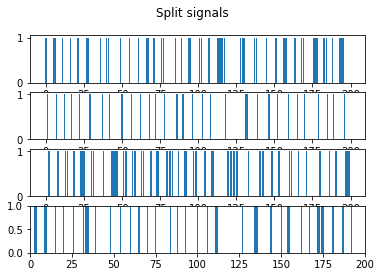

In [4]:
def main():
    split_fig2 = split_signal()
    split_fig2.split(padroes_fig2)
    split_fig2.relative_frequency()
    split_fig2.plots()    

class split_signal:
    def __init__(self):
        self.list_zero = []
        self.list_one = []
        self.list_two = []
        self.list_three = []
        self.lista_burst = []
        self.relative_fre = []
    def split(self, lista):
        for i in range(len(lista)):
            if lista[i] == 0:
                self.list_zero.append(1)
            else:
                self.list_zero.append(0)
        for i in range(len(lista)):
            if lista[i] == 1:
                self.list_one.append(1)
            else:
                self.list_one.append(0)
        for i in range(len(lista)):
            if lista[i] == 2:
                self.list_two.append(1)
            else:
                self.list_two.append(0)
        for i in range(len(lista)):
            if lista[i] == 3:
                self.list_three.append(1)
            else:
                self.list_three.append(0)
        #print(self.list_one)
    def relative_frequency(self):    
        for i in range (len(self.list_zero)):
            self.relative_fre.append((self.list_zero[i])/(len(self.list_zero)))
    def plots(self):
        fig, axs = plt.subplots(4)
        fig.suptitle('Split signals')
        x = np.arange(200)
        axs[0].bar(x, self.list_zero)
        axs[1].bar(x, self.list_one)
        axs[2].bar(x, self.list_two)
        axs[3].bar(x, self.list_three)
        pylab.xlim(0,200)
        pylab.ylim(0,1)
       
    
if __name__ == "__main__":
    main()

In [5]:
def main():
    burst_fig2 = burst()
    burst_fig2.split(padroes_fig2)
    burst_fig2.relative_frequency()
    burst_fig2.burst_(200 - 1)
    burst_fig2.media_burst()
    burst_fig2.desvio_burst()
    burst_fig2.entropia()

class burst(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.lista_burst = []
    def burst_(self, interacoes):
        i = 1
        L = self.list_zero
        while (i<=interacoes):
            if(L[i] == 1):
                i_0 = 1
                while (L[i] == 1) and (i<interacoes):
                    i+=1
                if (i == M)and(L[i] == 1):
                    i = M-1
                bs = i-i_0
                if(bs>0):
                    self.lista_burst.append(bs)
            i += 1
        #print(self.lista_burst)
    def media_burst(self):
        media = np.mean(self.lista_burst)
        print("Média:",media)
    def desvio_burst(self):
        desvio = np.std(self.lista_burst)
        print("Desvio padrao:", desvio)
    def entropia(self):
        indices = []
        for i in range(len(self.relative_fre)):
            if self.relative_fre[i] != 0:
                k = (self.relative_fre[i])*(math.log(self.relative_fre[i],2))
                indices.append(k)
        #print(self.relative_fre)
        epsilon = (-1)*sum(indices)
        eta = 2**((-1)*sum(indices))
        print("Entropia:", epsilon)
        print("Evenness:", eta)
        
if __name__ == '__main__':
    main()

Média: 97.8
Desvio padrao: 58.04848548124805
Entropia: 2.1020604521880517
Evenness: 4.293221037484912


In [6]:
def main():
    intersymbol_fig2 = inter_symbol()
    intersymbol_fig2.split(padroes_fig2)
    intersymbol_fig2.distance(200)
    intersymbol_fig2.distancias()
    intersymbol_fig2.number_distance()
    intersymbol_fig2.media_desvio()
    intersymbol_fig2.entropia_evenness()
    
class inter_symbol(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.list_inter_symbol = []
        self.list_distancias = []
    def distance(self, interacoes):
        L = self.list_zero
        for i in range(interacoes):
            if(L[i] == 1):
                bs = 0
                while(L[i] == 0) & (i<interacoes):
                    i += 1
                if (i == interacoes) & (L[i] == 1):
                    bs = interacoes 
                elif (i == interacoes) & (L[i] == 0):
                    bs = 0
                elif (i<interacoes) & (L[i] == 1):
                    bs = i
                if (bs>0):
                    self.list_inter_symbol.append(bs)
            i += 1
        #print(self.list_inter_symbol)
    def number_distance(self):
        print("Número de distâncias intersímbolos:", len(self.list_inter_symbol))
    def distancias(self):    
        for i in range(0,(len(self.list_inter_symbol)-1)):
            k = self.list_inter_symbol[i+1] - self.list_inter_symbol[i] 
            self.list_distancias.append(k)
        print(self.list_distancias)
    def media_desvio(self):
        media_ = sum(self.list_distancias)/len(self.list_distancias)
        desvio_ = np.std(self.list_distancias)
        print("Média:",media_)
        print("Desvio:", desvio_)
    def entropia_evenness(self):
        k = []
        indices = []
        for i in range(len(self.list_distancias)):
            k.append(self.list_distancias[i]/len(self.list_distancias))
        for i in range(len(k)):
            if k[i] != 0:
                indices_ = ((k[i])*(math.log(k[i],2)))
                indices.append(indices_)
        entropia = -(sum(indices))
        evenness = 2**(entropia)
        print("Entropia:", entropia)
        print("Evenness:", evenness)
        
        
if __name__ == '__main__':
    main()

[1, 5, 5, 5, 6, 1, 8, 4, 1, 8, 6, 6, 5, 1, 4, 5, 1, 8, 4, 5, 1, 6, 1, 5, 6, 1, 1, 1, 1, 11, 1, 1, 7, 1, 7, 6, 5, 1, 1, 5, 1, 4, 1, 7, 1, 1, 4, 1, 1, 4, 5, 1, 1]
Número de distâncias intersímbolos: 54
Média: 3.5849056603773586
Desvio: 2.623795049693887
Entropia: 12.493238309970902
Evenness: 5765.533159841963


In [7]:
def main():
    fourier_fig2 = fourier_transform()
    fourier_fig2.split(padroes_fig2)      
    fourier_fig2.transform(200)
    fourier_fig2.media()
    fourier_fig2.desvio()

class fourier_transform(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.transformada = []
    def transform(self, interacoes):
        L = self.list_zero
        self.transformada = np.fft.fft(L, (interacoes-1))
        #print(self.transformada)
    def media(self):
        media = np.mean(self.transformada)
        print("Media:", media)
    def desvio(self):
        desvio_padrao = np.std(self.transformada)
        print("Desvio padrão:", desvio_padrao)        
    
if __name__ == "__main__":
    main()

Media: (1-3.5705665113572874e-17j)
Desvio padrão: 7.3484692283495345


In [8]:
def main():
    network_fig2 = network_based()
    network_fig2.visibility(padroes_fig2)
    network_fig2.average_degree()
    network_fig2.clustering_coefficient()

class network_based(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.M = np.zeros((200,200), dtype=int)
    def visibility(self, L):     
        for j in range(2,200):
            for i in range(1, j-1):
                flag = 1
                k = i + 1
                while (k <= j-1) and (flag == 1):
                    aux = L[j] + (L[i]-L[j])*(j-k)/(j-i)
                    if (L[k] >= aux):
                        flag = 0
                    k += 1
                if (flag == 1):
                    self.M[i][j] = 1
                    self.M[j][i] = 1
        #print(self.M)
    def average_degree(self):
        edges = 0
        for i in range(200):
            for j in range(200):
                if self.M[i][j] == 1:
                    edges += 1
        average = edges/200
        standard_deviation = self.M.std()
        print("Média:",average)
        print("Desvio padrão:",standard_deviation)
    def clustering_coefficient(self):
        degree_node = [] 
        contador = 0
        for i in range(len(self.M)):
            degree_node.append(sum(self.M[i]))
            contador += 1
        clustering_coefficient = sum(degree_node)/(contador*contador)
        print("Coeficiente de aglomeração:",clustering_coefficient)
            
if __name__ == '__main__':
    main()

Média: 2.51
Desvio padrão: 0.11132159494006544
Coeficiente de aglomeração: 0.01255


In [11]:
def main():
    dfa_fig2 = dfa()
    dfa_fig2.split(padroes_fig2)
    dfa_fig2.discrete_integral()
    
class dfa(split_signal):
    def __init__(self):
        split_signal.__init__(self)
        self.discrete_signal = []
        self.cumulative_sum = float()
    def discrete_integral(self):
        for i in range(len(self.list_zero)):
            mean = np.mean(self.list_zero)
            k = self.list_zero[i] - mean
            self.discrete_signal.append(k)
        self.cumulative_sum = sum(self.discrete_signal)
    #def fluctuation(self, m):
        
    
if __name__ == '__main__':
    main()

2.220446049250313e-15
